**Load and Explore Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/AI_Internship/Tweets.csv")

# Display basic info
print(df.info())

# Show first few rows
print(df.head())

# Check sentiment distribution
print(df['airline_sentiment'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [3]:
print(df.isnull().sum())  # Check missing values in each column

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


**Data Preprocessing**

In [4]:
df = df[['text', 'airline_sentiment']]  # Keep only necessary columns
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@user)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
print(df.head())  # Check cleaned text


[nltk_data] Downloading package stopwords to /root/nltk_data...


                                                text airline_sentiment  \
0                @VirginAmerica What @dhepburn said.           neutral   
1  @VirginAmerica plus you've added commercials t...          positive   
2  @VirginAmerica I didn't today... Must mean I n...           neutral   
3  @VirginAmerica it's really aggressive to blast...          negative   
4  @VirginAmerica and it's a really big bad thing...          negative   

                                        cleaned_text  
0                                               said  
1      plus youve added commercials experience tacky  
2       didnt today must mean need take another trip  
3  really aggressive blast obnoxious entertainmen...  
4                               really big bad thing  


[nltk_data]   Unzipping corpora/stopwords.zip.


**Exploratory Data Analysis (EDA)**

Check Sentiment Distribution

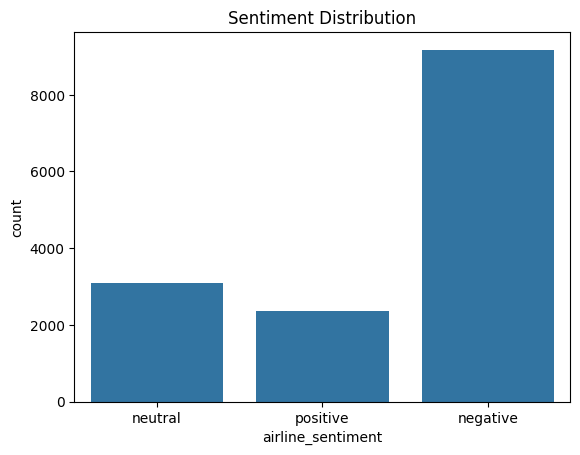

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=df['airline_sentiment'])
plt.title("Sentiment Distribution")
plt.show()


**Feature Extraction (TF-IDF Vectorization)**

Convert Text into TF-IDF Features

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=8000)  # Limit features to 8000 words

# Transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert sentiment labels into numerical values
y = df['airline_sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})


**Train Sentiment Classification Models**

Split Data into Training & Testing Sets

In [8]:
from sklearn.model_selection import train_test_split

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a Naive Bayes Model

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluate Model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7223360655737705
              precision    recall  f1-score   support

           0       0.71      0.99      0.83      1889
           1       0.74      0.20      0.32       580
           2       0.89      0.29      0.43       459

    accuracy                           0.72      2928
   macro avg       0.78      0.49      0.53      2928
weighted avg       0.75      0.72      0.66      2928



Train a Random Forest Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7759562841530054
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1889
           1       0.63      0.46      0.53       580
           2       0.77      0.57      0.66       459

    accuracy                           0.78      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.77      0.78      0.76      2928



**Compare Model Performance**

Evaluate Naive Bayes Model

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate Naive Bayes Model
print("📌 Naive Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


📌 Naive Bayes Model Performance:
Accuracy: 0.7223360655737705
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83      1889
           1       0.74      0.20      0.32       580
           2       0.89      0.29      0.43       459

    accuracy                           0.72      2928
   macro avg       0.78      0.49      0.53      2928
weighted avg       0.75      0.72      0.66      2928

Confusion Matrix:
 [[1866   21    2]
 [ 448  118   14]
 [ 307   21  131]]


Evaluate Random Forest Model

In [12]:
# Evaluate Random Forest Model
print("\n📌 Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



📌 Random Forest Model Performance:
Accuracy: 0.7759562841530054
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      1889
           1       0.63      0.46      0.53       580
           2       0.77      0.57      0.66       459

    accuracy                           0.78      2928
   macro avg       0.74      0.65      0.68      2928
weighted avg       0.77      0.78      0.76      2928

Confusion Matrix:
 [[1744  112   33]
 [ 268  266   46]
 [ 154   43  262]]


Save the Random Forest Model and Vectorizer

In [14]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "sentiment_model1.pkl")

# Save the TF-IDF vectorizer
joblib.dump(vectorizer, "vectorizer1.pkl")

print("✅ Model and Vectorizer saved successfully!")
import os
print("Current Working Directory:", os.getcwd())



✅ Model and Vectorizer saved successfully!
Current Working Directory: /content
